# 三、数据分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import missingno as msno
import seaborn as sns


df = pd.read_csv('d:/dataset4/car_data.csv', encoding='ISO-8859-1', sep=',')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340490 entries, 0 to 340489
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              340490 non-null  int64 
 1   abtest             340490 non-null  object
 2   vehicleType        340490 non-null  object
 3   gearbox            340490 non-null  object
 4   powerPS            340490 non-null  int64 
 5   model              340490 non-null  object
 6   kilometer          340490 non-null  int64 
 7   fuelType           340490 non-null  object
 8   brand              340490 non-null  object
 9   notRepairedDamage  340490 non-null  object
 10  car_month          340490 non-null  int64 
 11  online_days        340490 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 31.2+ MB


## 1、相关性

In [3]:
print(df['powerPS'].corr(df['price'], method='spearman'))
print(df['kilometer'].corr(df['price'], method='spearman'))
print(df['car_month'].corr(df['price'], method='spearman'))
print(df['online_days'].corr(df['price'], method='spearman'))

0.5322067924888528
-0.4026812974494663
-0.7139310422499346
0.14554899110923358


In [4]:
numeric_feature = ['price', 'powerPS', 'kilometer', 'online_days', 'car_month']
category_feature = ['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']

## 2、单变量分析

### vehicleType

<AxesSubplot:xlabel='vehicleType', ylabel='count'>

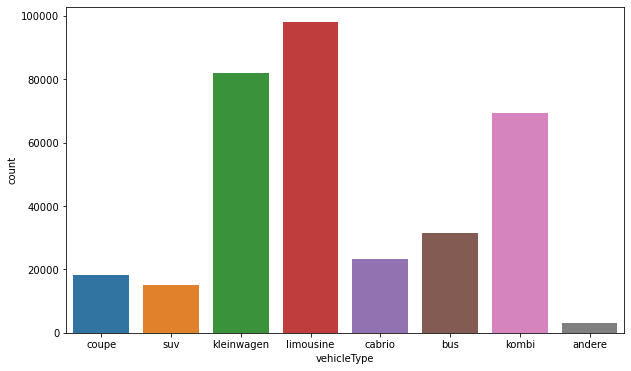

In [5]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'vehicleType',data = df)

轿车、小型车、小客车最多

### notRepairedDamage

<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

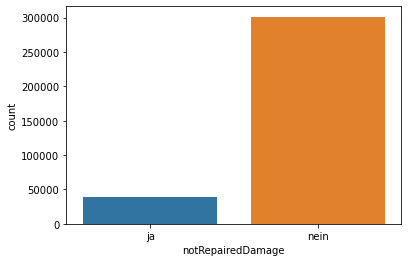

In [6]:
sns.countplot(x = 'notRepairedDamage',data = df)

### gearbox

<AxesSubplot:xlabel='gearbox', ylabel='count'>

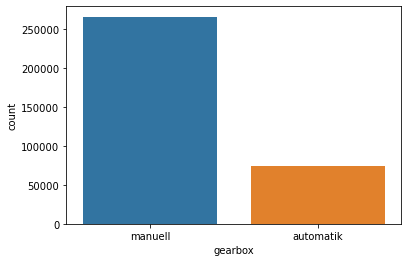

In [7]:
sns.countplot(x = 'gearbox',data = df)

### abtest

<AxesSubplot:xlabel='abtest', ylabel='count'>

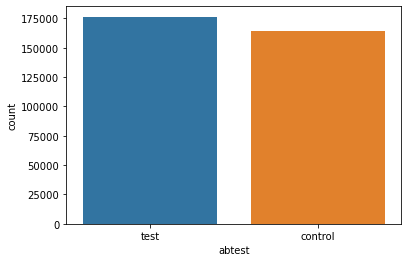

In [8]:
sns.countplot(x = 'abtest',data = df)

### fuelType

<AxesSubplot:xlabel='fuelType', ylabel='count'>

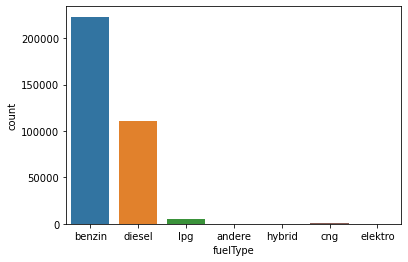

In [9]:
sns.countplot(x = 'fuelType',data = df)

传统的汽油柴油车依然居多，但这也可以解释，绝大部分数据来源于2000-2016年，新能源技术还并不发达




### brand

<AxesSubplot:xlabel='brand', ylabel='count'>

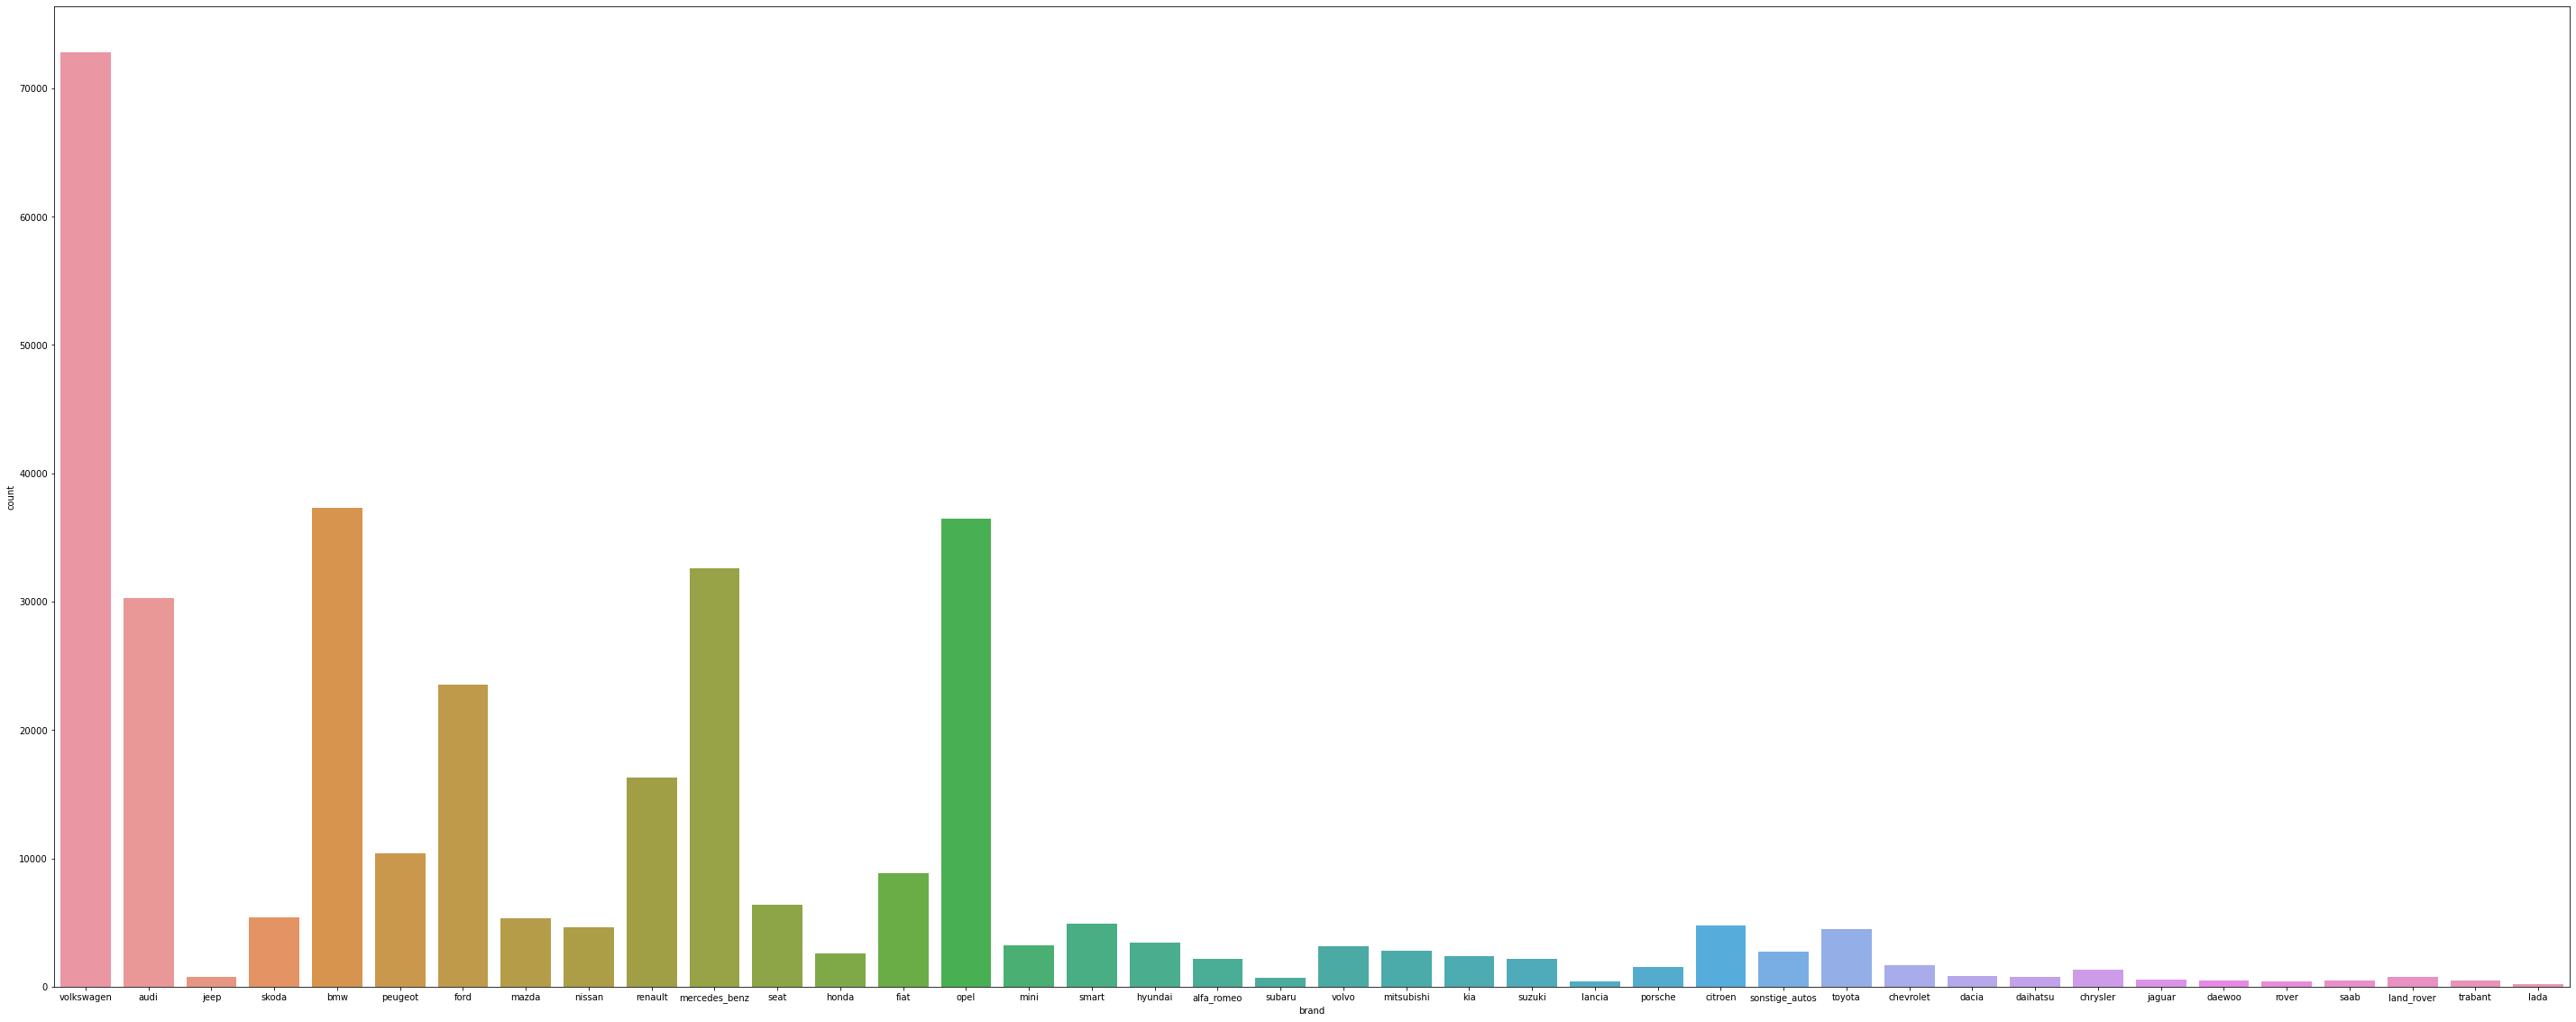

In [10]:
plt.figure(figsize = (50,20))
sns.countplot(x = 'brand',data = df)

大众、宝马、奔驰、欧宝居多

### model

<AxesSubplot:xlabel='model', ylabel='count'>

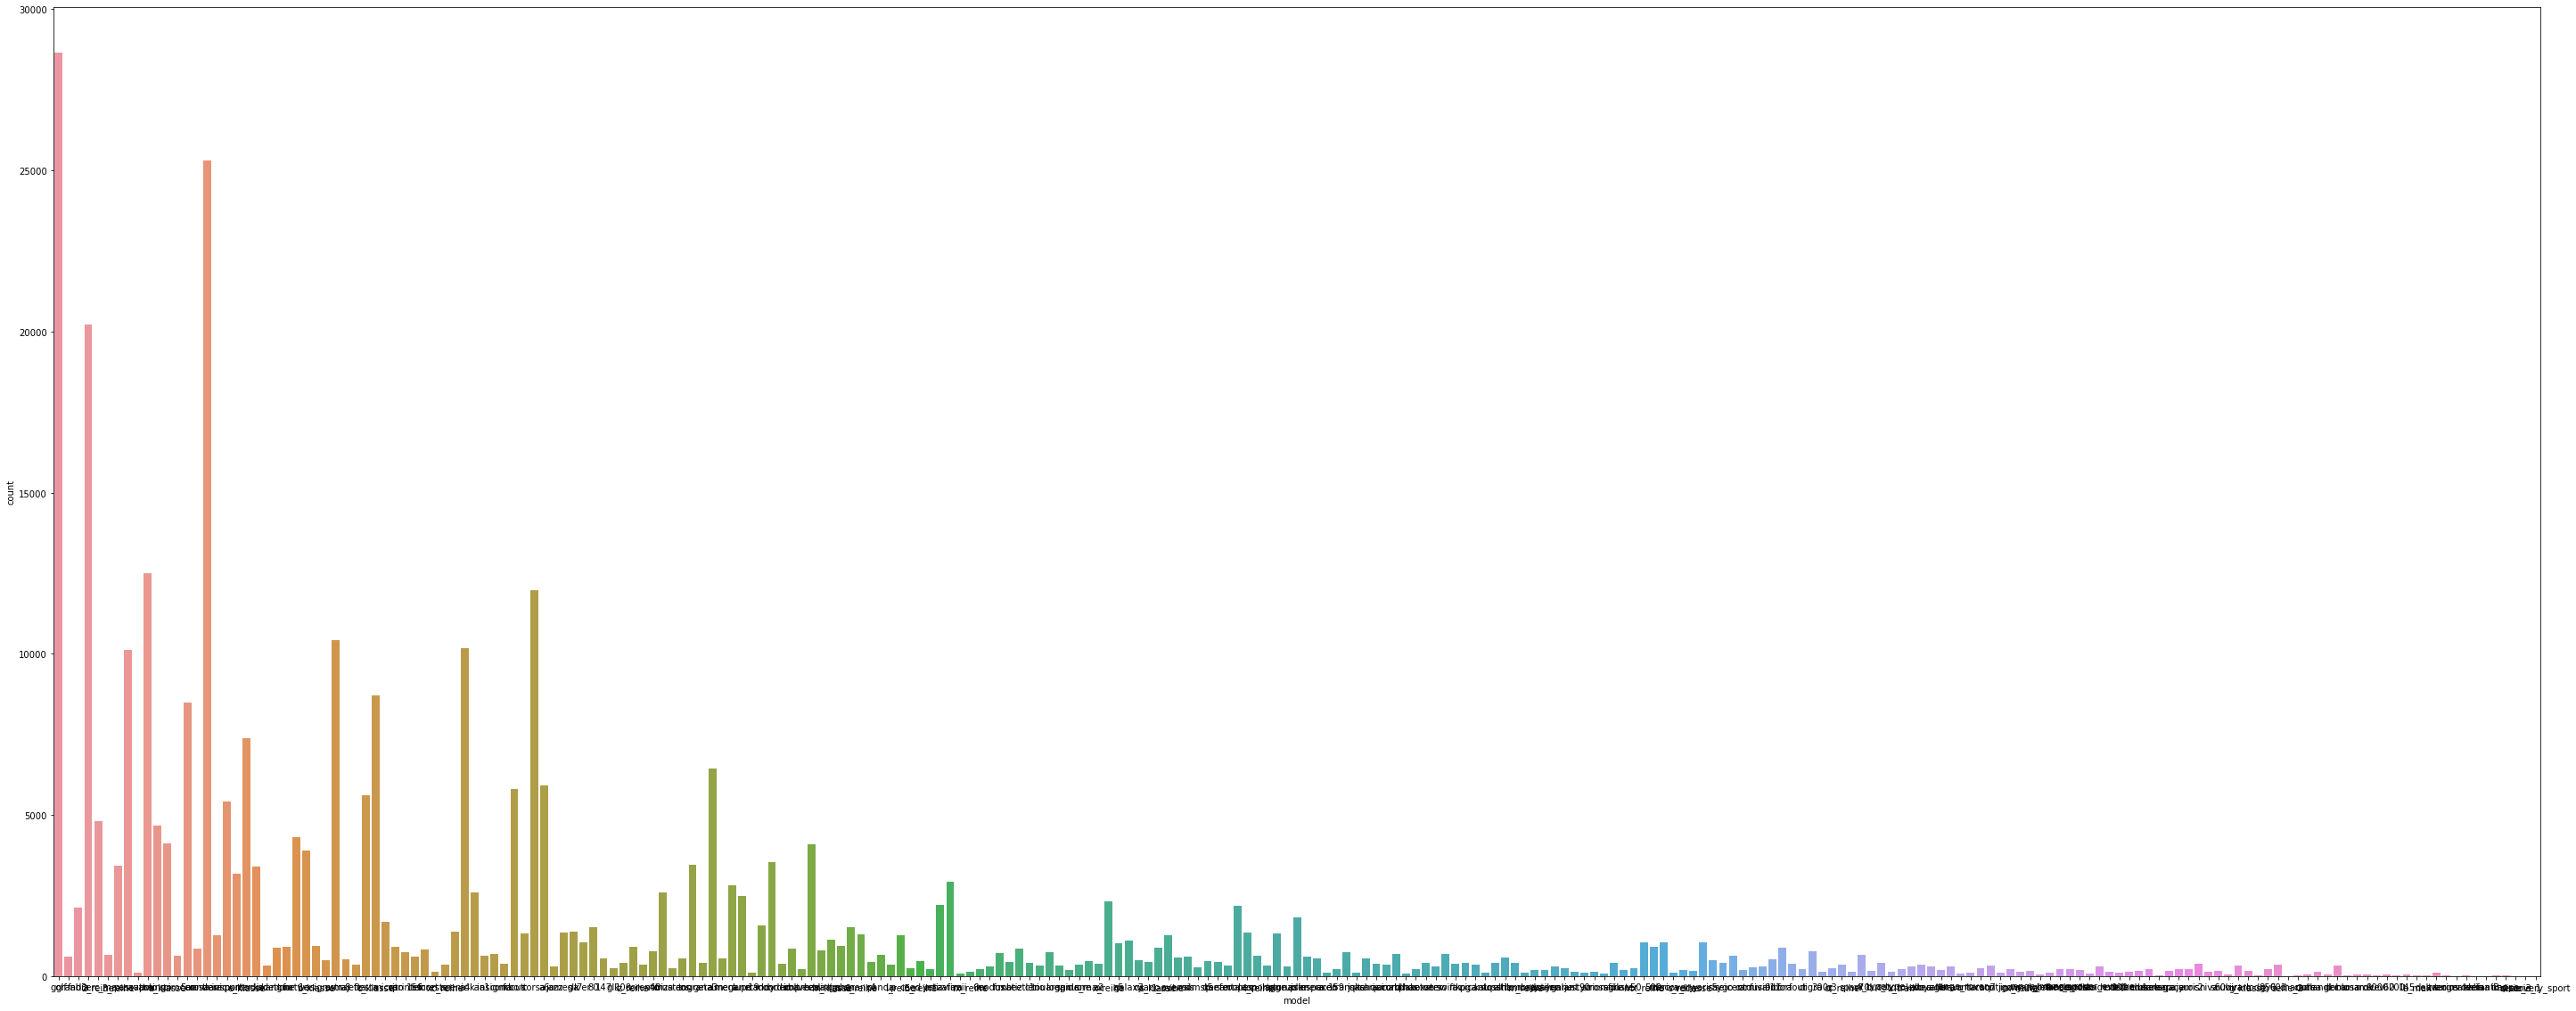

In [11]:
plt.figure(figsize = (50,20))
sns.countplot(x = 'model',data = df)

# 3.双变量分析

### vehicleType

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

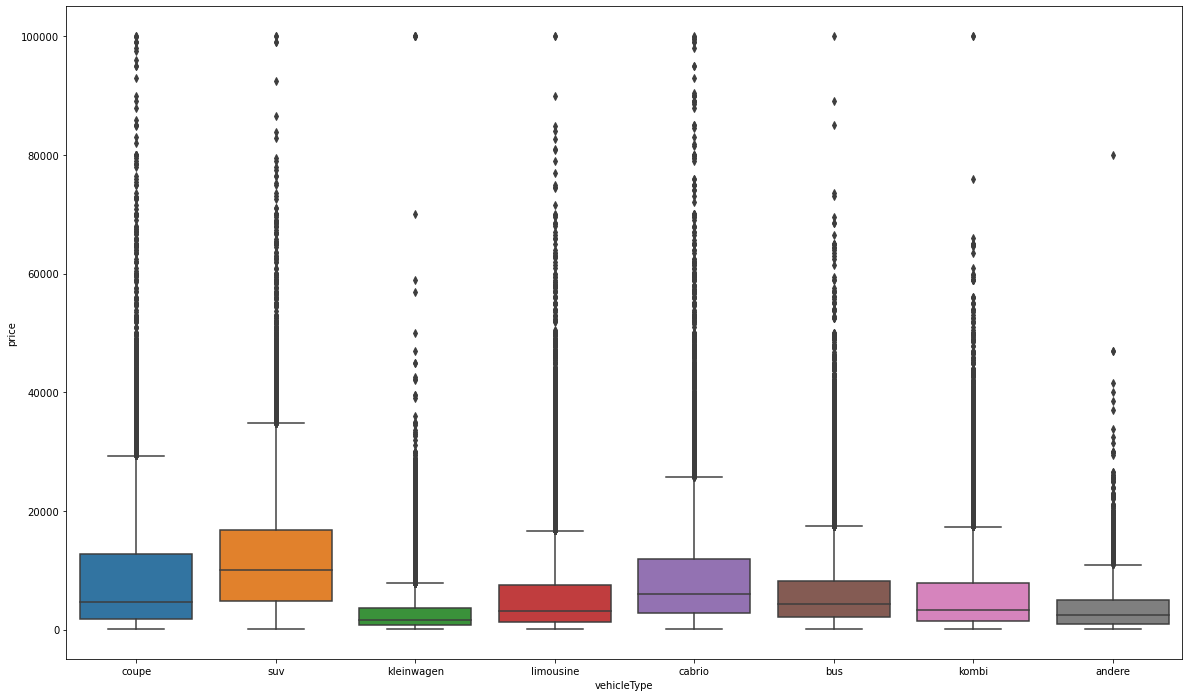

In [12]:
#plt.subplot(1)
plt.figure(figsize =(20,12))
sns.boxplot(y = 'price',x='vehicleType',data = df)

<BarContainer object of 8 artists>

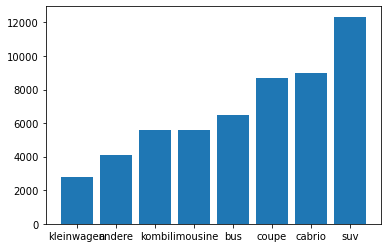

In [13]:
grouped = df.groupby(['vehicleType'])['price'].mean() 

a = pd.DataFrame(grouped).sort_values(by = 'price')

plt.bar(a.index, a['price'], width = 0.8)

suv价格显著高于其他，该特征对price影响较大

### gearbox

<AxesSubplot:xlabel='gearbox', ylabel='price'>

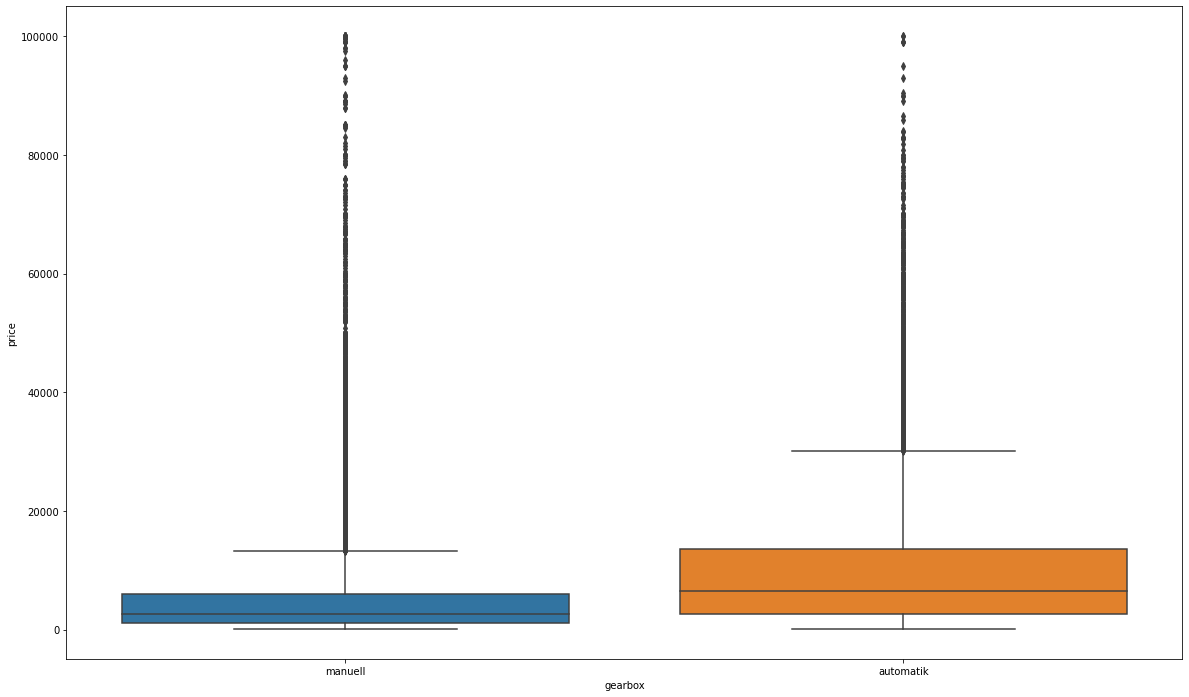

In [14]:
plt.figure(figsize =(20,12))
sns.boxplot(y = 'price',x='gearbox',data = df)

<BarContainer object of 2 artists>

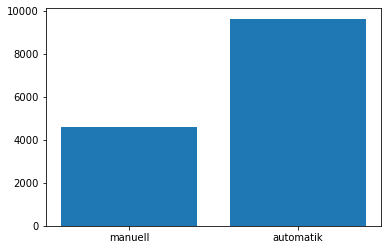

In [15]:
grouped = df.groupby(['gearbox'])['price'].mean() 

a = pd.DataFrame(grouped).sort_values(by = 'price')

plt.bar(a.index, a['price'], width = 0.8)

手动挡的车更多，但自动挡更贵

### abtest

<AxesSubplot:xlabel='abtest', ylabel='price'>

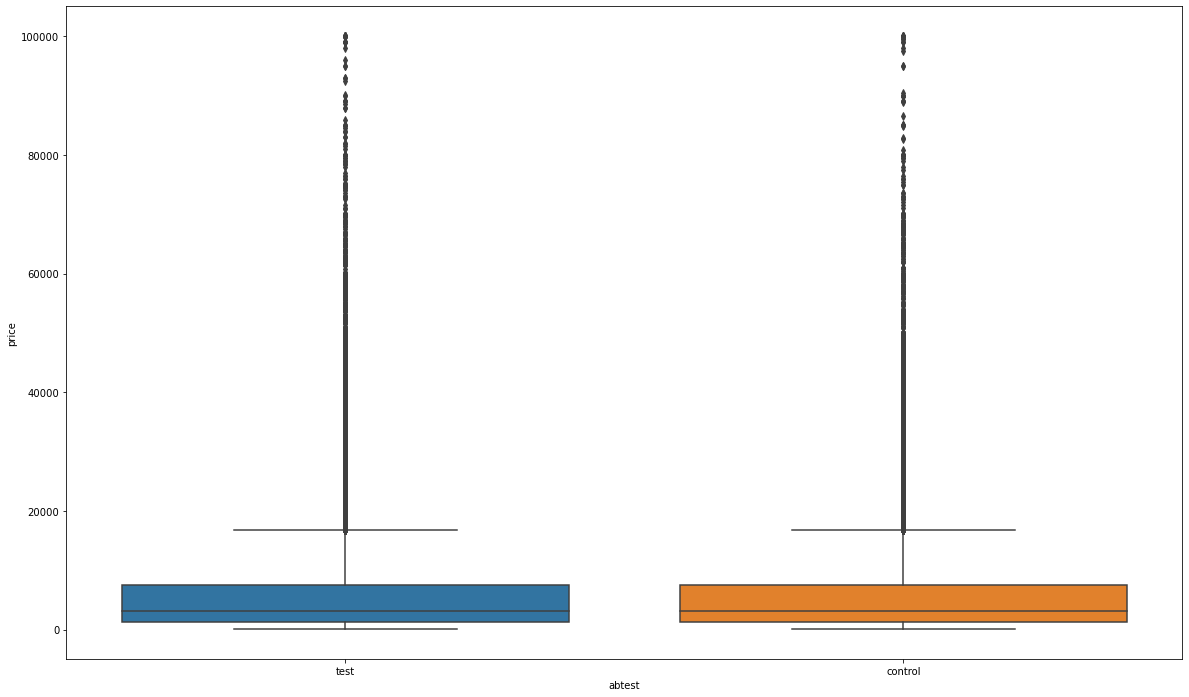

In [16]:
plt.figure(figsize =(20,12))
sns.boxplot(y = 'price',x='abtest',data = df)

abtest对价格影响很小

### brand

<AxesSubplot:xlabel='brand', ylabel='price'>

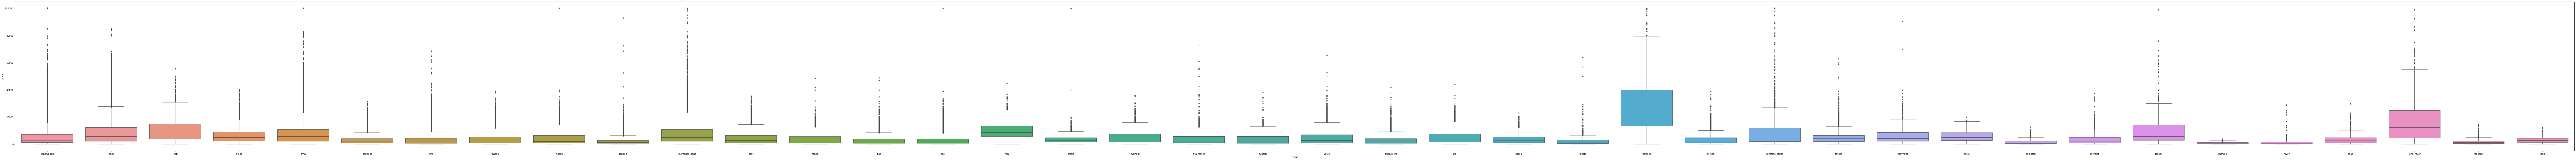

In [17]:
plt.figure(figsize =(200,12))
sns.boxplot(y = 'price',x='brand',data = df)

<BarContainer object of 40 artists>

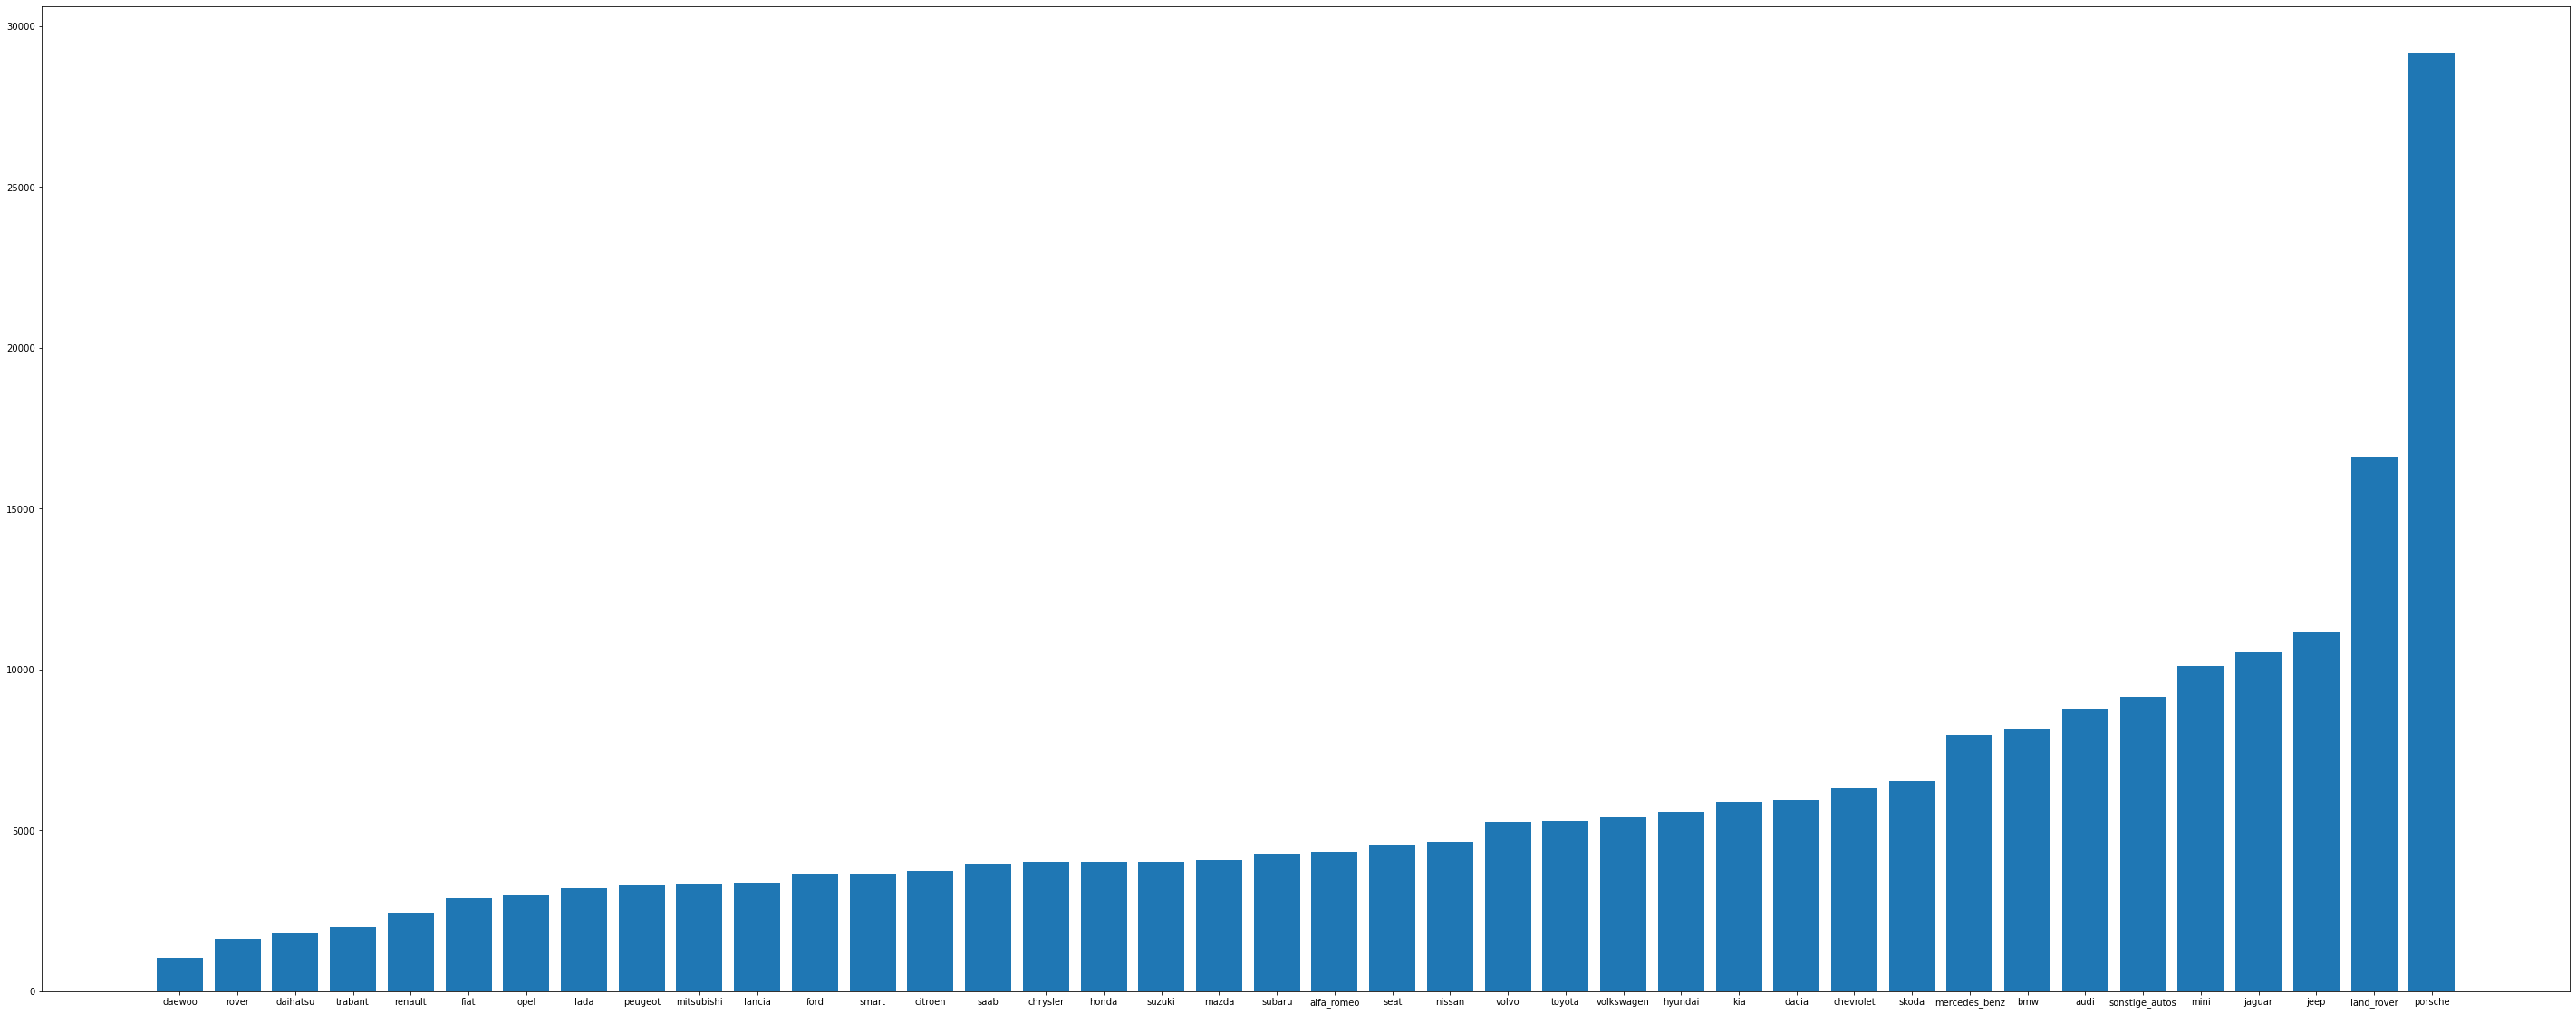

In [18]:
grouped = df.groupby(['brand'])['price'].mean() 

a = pd.DataFrame(grouped).sort_values(by = 'price')
plt.figure(figsize = (50,20))
plt.bar(a.index, a['price'], width = 0.8)

保时捷、路虎显著高于其他车

### fuelType

<AxesSubplot:xlabel='fuelType', ylabel='price'>

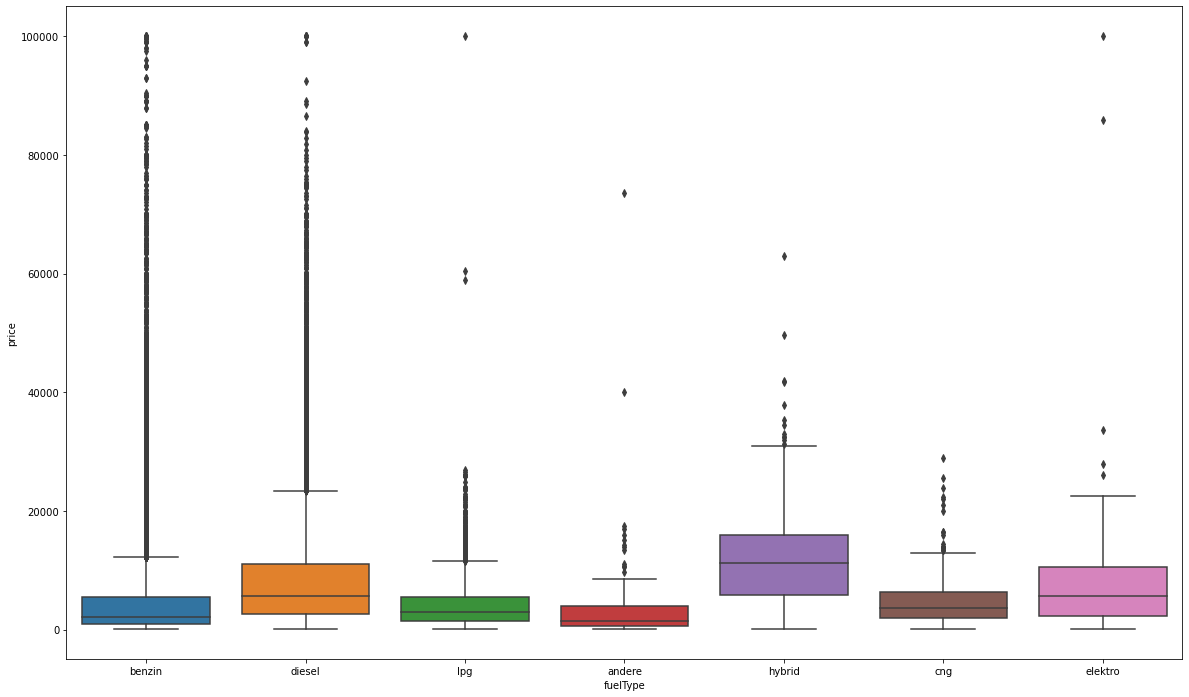

In [19]:
plt.figure(figsize =(20,12))
sns.boxplot(y = 'price',x='fuelType',data = df)

<BarContainer object of 7 artists>

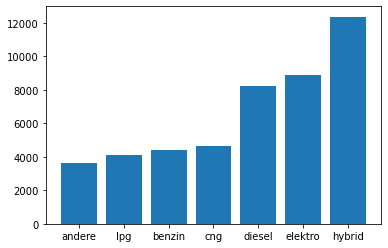

In [20]:
grouped = df.groupby(['fuelType'])['price'].mean() 

a = pd.DataFrame(grouped).sort_values(by = 'price')

plt.bar(a.index, a['price'], width = 0.8)

新能源车如用电,混合能源车更贵,这很好解释,技术要求更高

### notRepairedDamage

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

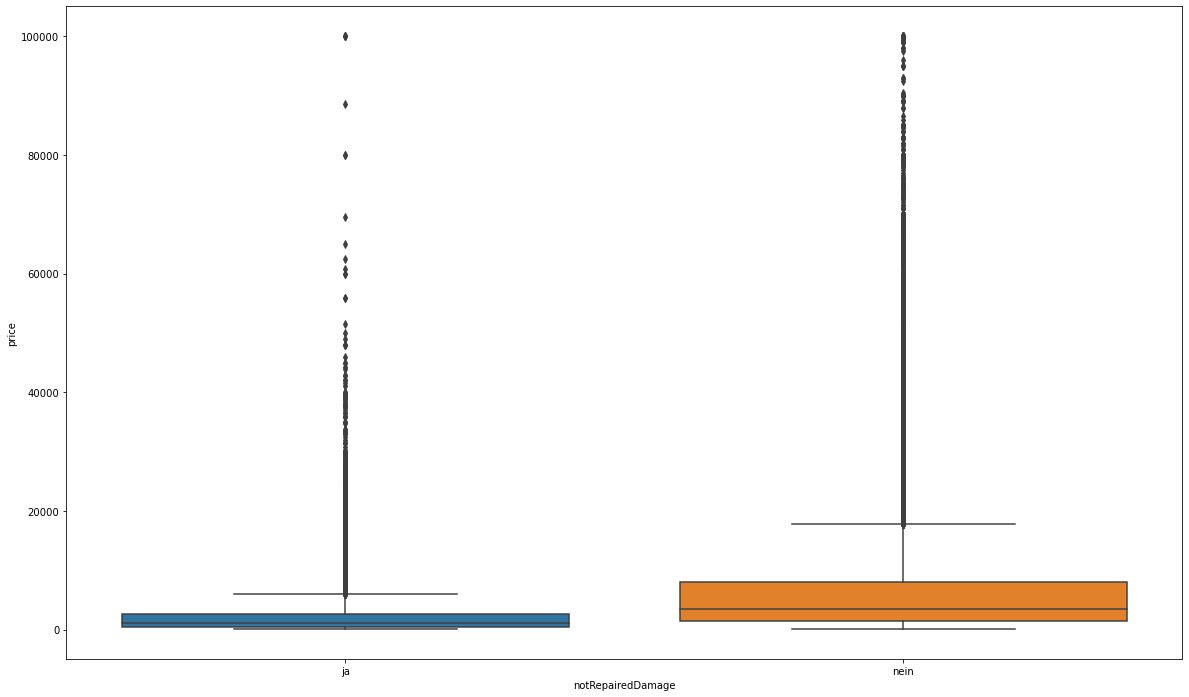

In [21]:
plt.figure(figsize =(20,12))
sns.boxplot(y = 'price',x='notRepairedDamage',data = df)

### model

<AxesSubplot:xlabel='model', ylabel='price'>

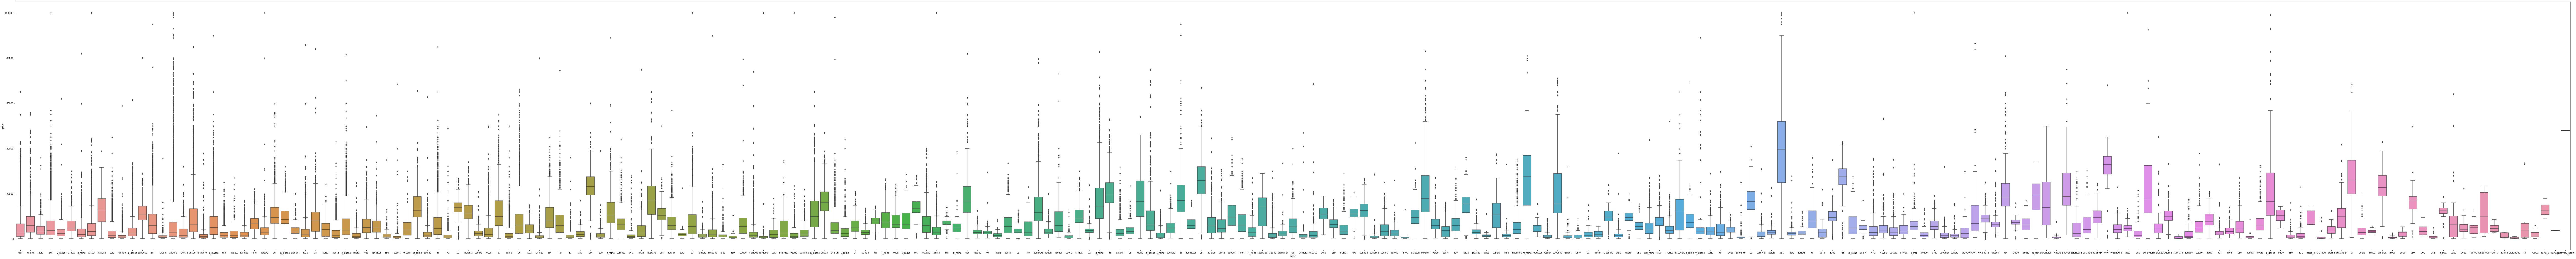

In [22]:
plt.figure(figsize =(200,20))
sns.boxplot(y = 'price',x='model',data = df)

<BarContainer object of 251 artists>

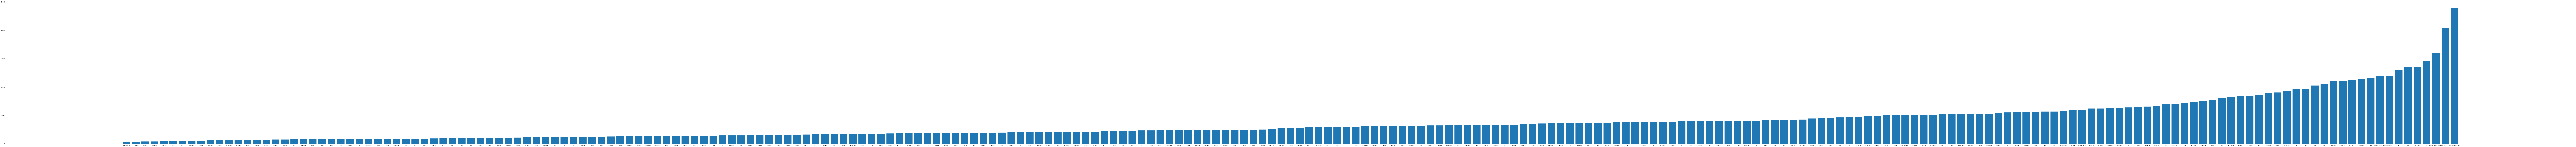

In [23]:
grouped = df.groupby(['model'])['price'].mean() 

a = pd.DataFrame(grouped).sort_values(by = 'price')
#a = a[a[]]

plt.figure(figsize = (350,20))
plt.bar(a.index, a['price'], width = 0.8)

这里最高的是路虎的discovery sport和保时捷的911

那么model对价格影响实则与brand密切相关，有没有必要将model单独拿出来训练模型？

### kilometer

<AxesSubplot:xlabel='kilometer', ylabel='price'>

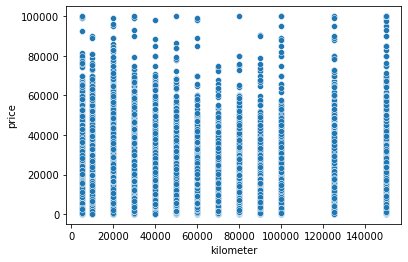

In [24]:
sns.scatterplot(y = 'price',x =  'kilometer',data = df)

### powerPS

<AxesSubplot:xlabel='powerPS', ylabel='price'>

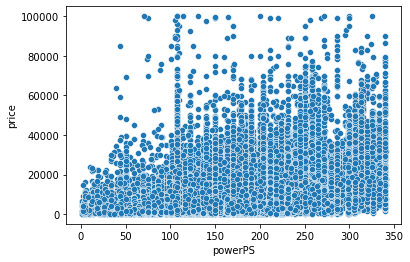

In [25]:
sns.scatterplot(y = 'price',x =  'powerPS',data = df)

### car_month

<AxesSubplot:xlabel='car_month', ylabel='price'>

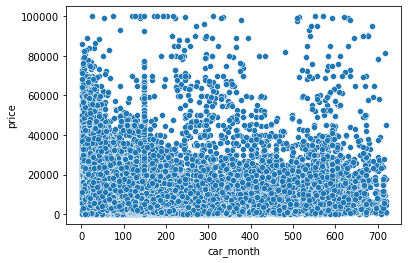

In [26]:
sns.scatterplot(y = 'price',x =  'car_month',data = df)

## 4.其他

<AxesSubplot:xlabel='fuelType', ylabel='powerPS'>

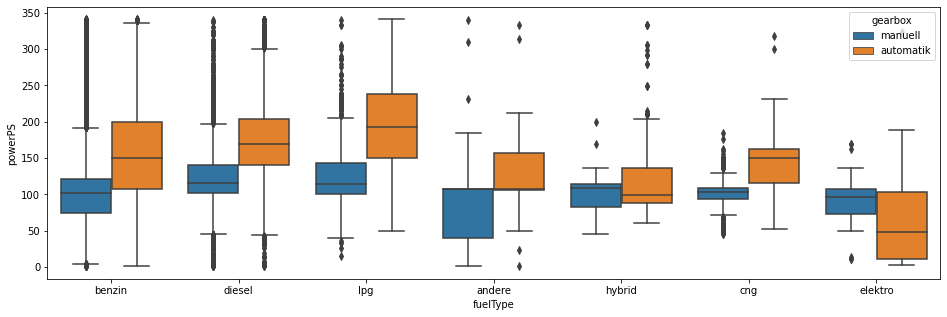

In [27]:
plt.figure(figsize = (16,5))
sns.boxplot(y = 'powerPS',x = 'fuelType',hue = 'gearbox',data = df)

燃油车的马力明显高于新能源车

## 5.结论

在数字特征中，影响最大的是car_month,powerPS,kilometer

在类别特征中,除了abtest影响都较大

In [28]:
for col in df.columns:
    print(col, ':',df[col].corr(df['price'], method='spearman'))

price : 1.0
abtest : 0.00020479391660097463
vehicleType : 0.045362348129668446
gearbox : -0.27609676516007087
powerPS : 0.5322067924888528
model : -0.0460169617213507
kilometer : -0.4026812974494663
fuelType : 0.3120883928830871
brand : -0.12404260432932207
notRepairedDamage : 0.26190056988291066
car_month : -0.7139310422499346
online_days : 0.14554899110923358
